In [9]:

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import copy




In [10]:
from google.colab import files


In [11]:
uploaded = files.upload()


Saving sales_data.csv to sales_data.csv


In [12]:
import pandas as pd

df = pd.read_csv("sales_data.csv")
print(df.head())


   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0  30-12-2019 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  29-12-2019 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12-12-2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22-12-2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18-12-2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  
0   New York City     0 

In [13]:
df.shape

(185950, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB



# 📝 Statistical Summary

In [15]:
df.describe(include = 'object')

,Product,Order Date,Purchase Address,City
count,185950,185950,185950,185950
unique,19,142395,140787,9
top,USB-C Charging Cable,15-12-2019 20:16,"193 Forest St, San Francisco, CA 94016",San Francisco
freq,21903,8,9,44732


In [16]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


# 👨🏽‍💻 Missing Value Analysis

In [17]:
df.isnull().sum()

,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0


In [18]:
df.duplicated().sum()


0

In [19]:
df['Order ID']=pd.to_numeric(df['Order ID'],errors='coerce')
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each']=pd.to_numeric(df['Price Each'],errors='coerce')
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

In [20]:
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [23]:
df['Order_month'] = df['Order Date'].dt.month

In [24]:
january_df = df[df['Order_month'] == 1].sort_values(by='Order Date')
february_df=df[df['Order_month']==2].sort_values(by='Order Date')
march_df=df[df['Order_month']==3].sort_values(by='Order Date')
april_df=df[df['Order_month']==4].sort_values(by='Order Date')
may_df=df[df['Order_month']==5].sort_values(by='Order Date')
june_df=df[df['Order_month']==6].sort_values(by='Order Date')
july_df=df[df['Order_month']==7].sort_values(by='Order Date')
august_df=df[df['Order_month']==8].sort_values(by='Order Date')
september_df=df[df['Order_month']==9].sort_values(by='Order Date')
october_df=df[df['Order_month']==10].sort_values(by='Order Date')
nomember_df=df[df['Order_month']==11].sort_values(by='Order Date')
december_df=df[df['Order_month']==12].sort_values(by='Order Date')

In [25]:
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Order_month
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,12
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,12
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,12
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,12
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,6
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,6
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,6
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,6


In [26]:
best_month=df.groupby('Order_month')[['Price Each']].sum()


In [27]:
best_month


,Price Each
Order_month,
1,1811768.38
2,2188884.72
3,2791207.83
4,3367671.02
5,3135125.13
6,2562025.61
7,2632539.56
8,2230345.42
9,2084992.09


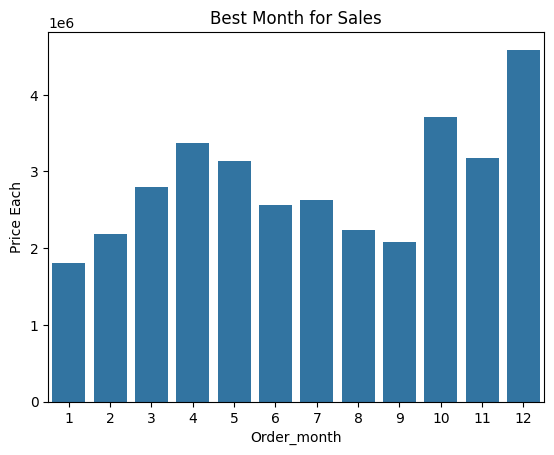

In [28]:
sns.barplot(x=best_month.index,y=best_month['Price Each'])
plt.title("Best Month for Sales")
plt.show()

in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical
Univariate data can be described through:

Frequency Distribution Tables
The frequency distribution table reflects how often an occurrence has taken place in the data. It gives a brief idea of the data and makes it easier to find patterns.

 Example:

The list of IQ scores is: 118, 139, 124, 125, 127, 128, 129, 130, 130, 133, 136, 138, 141, 142, 149, 130, 154.

IQ Range	Number
118-125	3
126-133	7
134-141	4
142-149	2
150-157	1


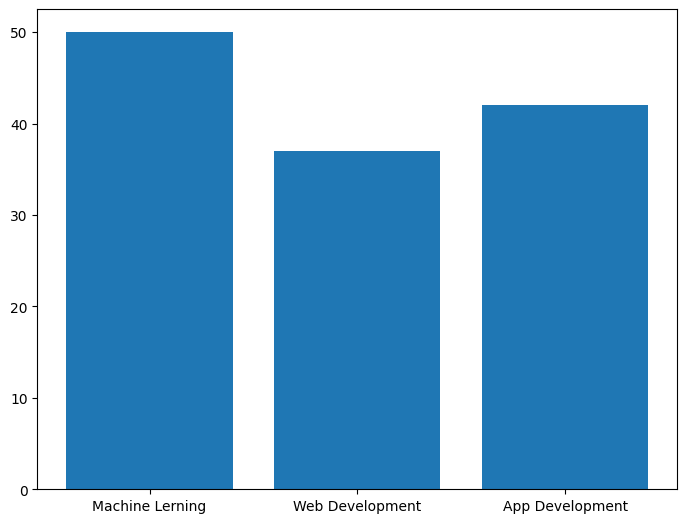

In [32]:
#Adjust the output window size for better view
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
courses = ['Machine Lerning','Web Development','App Development']
students_enrolled = [50,37,42]
ax.bar(courses,students_enrolled)
plt.show()

Bivariate Analysis
Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables

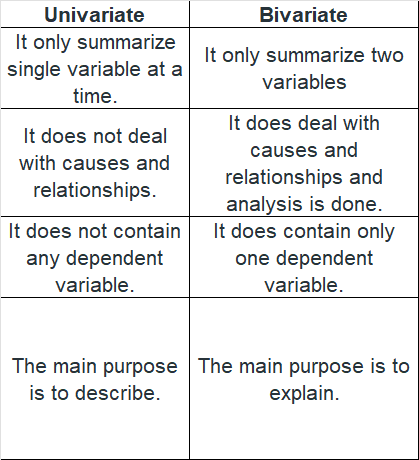

### **1. T-Test**

#### **What is a T-Test?**
A T-test is a statistical method used to determine whether there is a significant difference between the means of two groups. It is commonly used in hypothesis testing to compare population means.

#### **Types of T-Tests**:
1. **One-sample T-test**: Compares the mean of one group to a known value or population mean.
2. **Two-sample (Independent) T-test**: Compares the means of two independent groups.
3. **Paired T-test**: Compares the means of the same group at two different times or under different conditions.

#### **When to Use?**
A T-test is used when:
- The data is approximately normally distributed.
- The dependent variable is continuous.
- The independent variable is categorical with two levels.

#### **Example Using Sales Data**:
A company wants to check if there is a significant difference in the average monthly sales between two regions (Region A and Region B).  
- **Null Hypothesis (\(H_0\))**: There is no difference in the average sales between the two regions.
- **Alternative Hypothesis (\(H_1\))**: There is a significant difference in the average sales.

#### **Implementation**:
1. Collect sales data for the two regions.
2. Perform a two-sample T-test to determine whether the difference in means is statistically significant.

---

### **2. Chi-Square Test for Independence**

#### **What is a Chi-Square Test?**
The Chi-square test for independence is a non-parametric test used to determine whether there is a significant association between two categorical variables.

#### **When to Use?**
It is appropriate when:
- Both variables are categorical.
- You want to test whether the two variables are independent or associated.

#### **Example Using Shipping Mode and Customer Segment**:
A company wants to determine if there is a relationship between the mode of shipping (e.g., Standard, Express, Same Day) and the customer segment (e.g., Individual, Corporate, Small Business).

#### **Steps**:
1. **Create a Contingency Table**:
   - Count the occurrences of each combination of shipping mode and customer segment.

2. **Set Hypotheses**:
   - \(H_0\): Shipping mode and customer segment are independent.
   - \(H_1\): Shipping mode and customer segment are not independent.

3. **Perform Chi-Square Test**:
   - Use the observed and expected frequencies to calculate the Chi-square statistic and p-value.

#### **Interpretation**:
- If the p-value is less than the significance level (e.g., 0.05), reject \(H_0\), indicating a significant association.




# heatmap
---



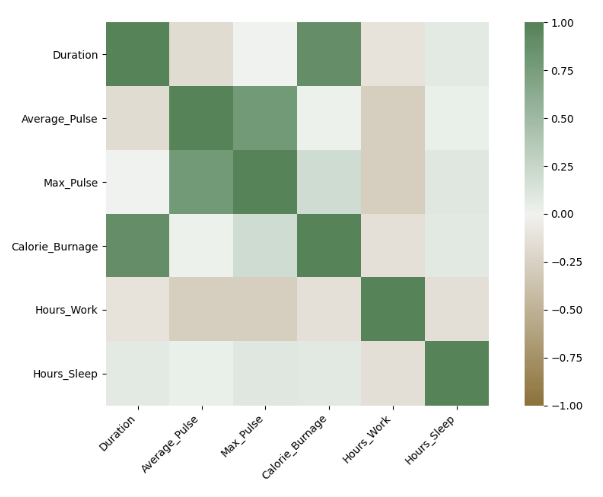